In [30]:
import pandas as pd

pd.to_datetime('January/02/2011')

Timestamp('2011-01-02 00:00:00')

In [26]:
# using not a normal way to represent date time will produce error
pd.to_datetime('Jan:1:1970')



In [31]:
# to fix the error we got above

pd.to_datetime('Jan:1:1970', format='%b:%d:%Y')

Timestamp('1970-01-01 00:00:00')

In [32]:
df = pd.read_csv('https://gist.githubusercontent.com/zgulde/c60209f379155744ced4dfc57068e55b/raw/97fc3ab1e2f6fff6ffd409d60029c53954d5784e/coffee_consumption.csv')

In [33]:
df

,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563
...,...,...
256,2019-12-25,12.250875
257,2019-12-26,7.513206
258,2019-12-27,9.464345
259,2019-12-30,14.623106


In [34]:
# the date is not of datetime format. So, we must convert it first
df.dtypes

date                   object
coffee_consumption    float64
dtype: object

In [35]:
# convert our date column to datetime type
df.date = pd.to_datetime(df.date)
df.dtypes

date                  datetime64[ns]
coffee_consumption           float64
dtype: object

In [36]:
# Accessing the year, month, day, and day name from our datetime dtype.

df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['weekday'] = df.date.dt.day_name()
df.head()

,date,coffee_consumption,year,month,day,weekday
0,2019-01-01,14.301915,2019,1,1,Tuesday
1,2019-01-02,12.905900,2019,1,2,Wednesday
2,2019-01-03,10.046015,2019,1,3,Thursday
3,2019-01-04,6.354805,2019,1,4,Friday
4,2019-01-07,8.545563,2019,1,7,Monday


In [37]:
# cleanup demonstration columns
del df['year']
del df['day']
del df['month']
del df['weekday']

**DateTime Indexers**

In [38]:
# setting date as index. sort_index is extremely important

df = df.set_index('date').sort_index()

In [39]:
df

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-07,8.545563
...,...
2019-12-25,12.250875
2019-12-26,7.513206
2019-12-27,9.464345


In [40]:
df.index.min(), df.index.max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2019-12-31 00:00:00'))

In [43]:
# the ending date here is inclusive compared to list slicing

df['2019-05-03':'2019-05-25']

,coffee_consumption
date,
2019-05-03,7.790948
2019-05-06,13.196664
2019-05-07,11.725856
2019-05-08,8.495455
2019-05-09,11.407965
2019-05-10,11.344190
2019-05-13,9.517543
2019-05-14,6.220478
2019-05-15,12.743796


**downsample:** larger time window == more data points

**upsample:** smaller time window == lesser data points

In [45]:
df_by_day = df.asfreq('D')

In [48]:
df_by_day

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-05,NaN
...,...
2019-12-27,9.464345
2019-12-28,NaN
2019-12-29,NaN


**Filling missing values that we just introduced**

In [50]:
df_by_day.coffee_consumption.ffill()

date
2019-01-01    14.301915
2019-01-02    12.905900
2019-01-03    10.046015
2019-01-04     6.354805
2019-01-05     6.354805
                ...    
2019-12-27     9.464345
2019-12-28     9.464345
2019-12-29     9.464345
2019-12-30    14.623106
2019-12-31    10.168315
Freq: D, Name: coffee_consumption, Length: 365, dtype: float64

In [51]:
df_by_day.coffee_consumption.bfill()

date
2019-01-01    14.301915
2019-01-02    12.905900
2019-01-03    10.046015
2019-01-04     6.354805
2019-01-05     8.545563
                ...    
2019-12-27     9.464345
2019-12-28    14.623106
2019-12-29    14.623106
2019-12-30    14.623106
2019-12-31    10.168315
Freq: D, Name: coffee_consumption, Length: 365, dtype: float64

In [54]:
# we will fill with 0 because we have noone come to the office during the weekend
# so 0 coffee consumption
df = df_by_day.fillna(0)

In [55]:
df

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-05,0.000000
...,...
2019-12-27,9.464345
2019-12-28,0.000000
2019-12-29,0.000000


### Resampling
- Kind of like groupby for dates

In [56]:
df.resample('3W').mean()

,coffee_consumption
date,
2019-01-06,7.268106
2019-01-27,6.960135
2019-02-17,7.753787
2019-03-10,6.723909
2019-03-31,7.901977
2019-04-21,7.301799
2019-05-12,7.208603
2019-06-02,7.894871
2019-06-23,6.851534


In [61]:
df.resample('3M').sum()

,coffee_consumption
date,
2019-01-31,233.926749
2019-04-30,647.848480
2019-07-31,680.404050
2019-10-31,683.849592
2020-01-31,446.506338


In [65]:
# getting the month to month average of total weekly coffee consumption
df.resample('W').sum().resample('M').mean()

,coffee_consumption
date,
2019-01-31,47.442870
2019-02-28,52.967916
2019-03-31,51.620292
2019-04-30,50.566915
2019-05-31,52.163714
2019-06-30,48.648939
2019-07-31,52.279082
2019-08-31,53.288159
2019-09-30,50.882459


In [66]:
# df.resample('MS') - month start
# df.resample('Q') - Quarterly

## Plotting

<AxesSubplot:xlabel='date'>

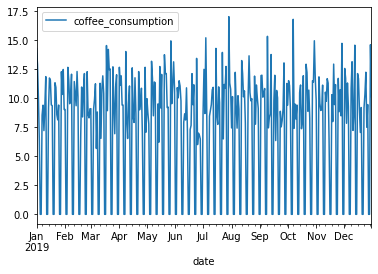

In [68]:
df.plot()

<AxesSubplot:xlabel='date'>

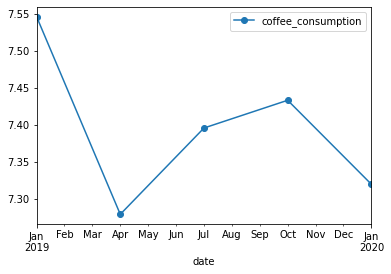

In [71]:
df.resample('3M').mean().plot(marker = 'o')

### rolling windows
- the idea is like rolling average, moving average

In [76]:
df.rolling(2).mean()

,coffee_consumption
date,
2019-01-01,NaN
2019-01-02,13.603907
2019-01-03,11.475958
2019-01-04,8.200410
2019-01-05,3.177403
...,...
2019-12-27,8.488776
2019-12-28,4.732173
2019-12-29,0.000000


### Lagging and Leading
- way to compare each data point with previous data points or future data points
- **shift** moves data points forward or backward
- **diff** takes the difference between future or past fata points